# Analysis of DeepPath Experiments
This notebook documents our analysis of performance results from various experiments ran on DeepPath models

In [1]:
# Packages/Helper Function Import
from pathlib import Path
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import deeppath_parsers as dp

In [2]:
# Directory Constants
output_dir = Path("work/output/")

## Phase 1 Analyses
Phase 1 analyses the failure modes of the model by pertubing input datasets in various ways

In [3]:
# Phase 1 Study Labels
phase1_labels = {
    "exp_bubbles_20": "Bubbles (20%)",
    "exp_fold_20": "Folds (20%)",
    "exp_illumination_50": "Illumination (50%)",
    "exp_illumination_10": "Illumination (10%)",
    "exp_illumination_100": "Illumination (10%)",
    "exp_illumination_50": "Illumination (50%)",
    "exp_marker_15": "Marker (15%)",
    "exp_marker_80": "Marker (80%)",
    "exp_sectioning_15": "Sectioning (15%)",
    "exp_sectioning_30" : "Sectioning (30%)",
    "phase1_exp": "Unperturbed"
}

In [4]:
phase1_exp = list(output_dir.glob("exp_*_*")) + [output_dir/"phase1_exp/"]
phase1_slide_probs = pd.concat({
    study.stem:pd.DataFrame(dp.parse_slide_probs(study / "auc" / "out2_perSlideStats.txt"))
    for study in phase1_exp
},names=["study"]).reset_index()

## Phase 2 Analyses

In [5]:
# Phase 2 Study Labels
phase2_labels = {
    "phase2_gender_female": "Sex: Female",
    "phase2_gender_male": "Sex: Male",
    "phase2_race_asian": "Race: Asian",
    "phase2_race_black": "Race: Black",
    "phase2_race_white": "Race: White"
}

In [6]:
phase2_exp = list(output_dir.glob("phase2_*/"))
phase2_slide_probs = pd.concat({
    study.stem:pd.DataFrame(dp.parse_slide_probs(study / "auc" / "out2_perSlideStats.txt"))
    for study in phase2_exp
},names=["study"]).rename(index=phase2_labels).sort_index().reset_index("study")

Text(0, 0.5, 'Average Positive Probability (True Class)')

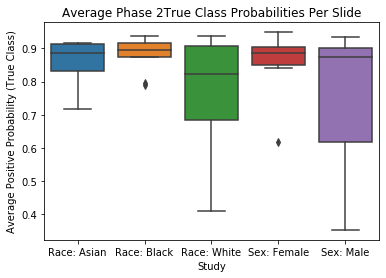

In [7]:
fig = sns.boxplot(x=phase2_slide_probs["study"],y=phase2_slide_probs["true_av_prob"])
fig.set_title("Average Phase 2True Class Probabilities Per Slide")
fig.set_xlabel("Study")
fig.set_ylabel("Average Positive Probability (True Class)")

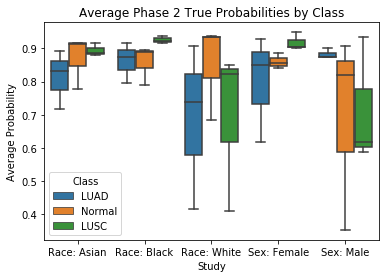

In [8]:
fig = sns.boxplot(
    data=phase2_slide_probs[["study","class","true_av_prob"]],
    x="study",
    y="true_av_prob",
    hue="class"
)
fig.set_xlabel("Study")
fig.set_ylabel("Average Probability")
fig.set_title("Average Phase 2 True Probabilities by Class")
plt.legend(title="Class")

In [9]:
phase2_auc = pd.concat({
    study.stem:pd.DataFrame(dp.parse_auc_file(study / "auc_summary.txt"))
    for study in phase2_exp
},names=["study"]).rename(index=phase2_labels).sort_index().reset_index("study")
phase2_auc_slide = phase2_auc[phase2_auc.type=="slide"]
phase2_auc_tile = phase2_auc[phase2_auc.type=="tile"]

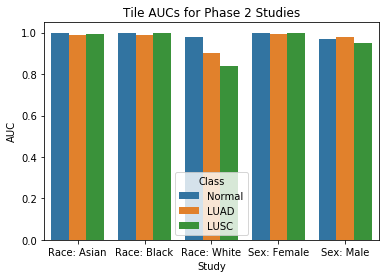

In [10]:
fig = sns.barplot(
    data=phase2_auc_tile,
    x="study",
    y="auc",
    hue="class",
    #yerr=phase2_auc_tile[["ci_lower","ci_upper"]].values.T
)
fig.set_title("Tile AUCs for Phase 2 Studies")
fig.set_xlabel("Study")
fig.set_ylabel("AUC")
plt.legend(title="Class")

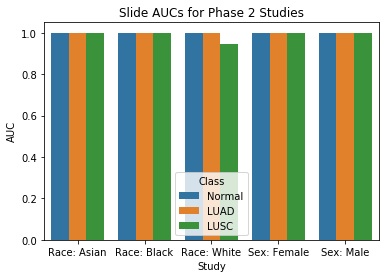

In [11]:
fig = sns.barplot(
    data=phase2_auc_slide,
    x="study",
    y="auc",
    hue="class",
    #yerr=phase2_auc_tile[["ci_lower","ci_upper"]].values.T
)
fig.set_title("Slide AUCs for Phase 2 Studies")
fig.set_xlabel("Study")
fig.set_ylabel("AUC")
plt.legend(title="Class")